# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
print(len(mouse_metadata))
print(len(study_results))
print(mouse_metadata.head())
print(study_results.head())


249
1893
  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [94]:
# Display the data table for preview
mouse_df=pd.merge(study_results,mouse_metadata,  how='left', on='Mouse ID')
print(len(mouse_df))
mouse_df.head()
#mouse_df=mouse_df.sort_values(by=['Timepoint'])
mouse_df

1893


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [95]:
# Display the data table for preview


In [96]:
# Checking the number of mice.
len(mouse_df['Mouse ID'].value_counts())

249

In [97]:
# Checking the number of mice.


In [98]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df.nunique()
mouse_df.loc[mouse_df.duplicated(), :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [99]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [100]:
mouse_dup_df=mouse_df.loc[mouse_df["Mouse ID"] == "g989"]
mouse_dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [101]:
# Optional: Get all the data for the duplicate mouse ID. 


In [102]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_df.loc[mouse_df['Mouse ID'] != 'g989']

mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [103]:
len(mouse_df['Mouse ID'].value_counts())

248

In [104]:
# Checking the number of mice in the clean DataFrame.


In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_df1=mouse_df.groupby(['Drug Regimen'])
mouse_summary_df=mouse_df1["Tumor Volume (mm3)"].describe()
mouse_summary_df
#mouse_summary_df=mouse_df1["Tumor Volume (mm3)"].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Summary Statistics

In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_summary_df1=mouse_df1.agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var','std','sem']})
mouse_summary_df1

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Tumor Volume (mm3), dtype: int64


<IPython.core.display.Javascript object>


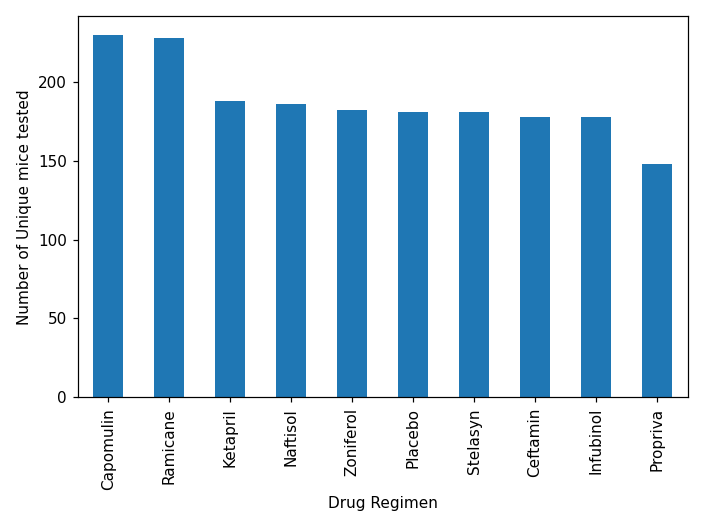

In [108]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
%matplotlib notebook
miceTested = mouse_df1["Tumor Volume (mm3)"].count()
miceTested=miceTested.sort_values(ascending=False)
print(miceTested)
count_chart = miceTested.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Unique mice tested")


plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


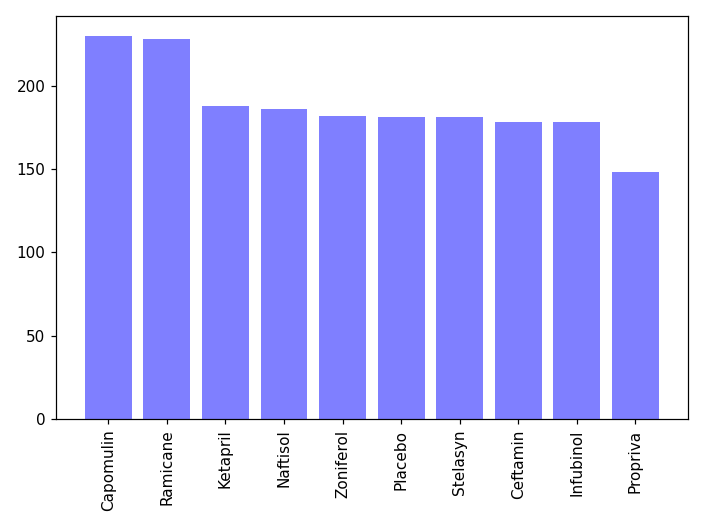

In [80]:
%matplotlib notebook
mouse_df1
drugs= ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol", "Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"]
mice_count = miceTested
x_axis = np.arange(len(drugs))
# Create a bar chart based upon the above data
plt.bar(x_axis, mice_count, color='b', alpha=0.5, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol", "Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"],rotation=90)
plt.tight_layout()

plt.show()

In [77]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.


Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64


<IPython.core.display.Javascript object>


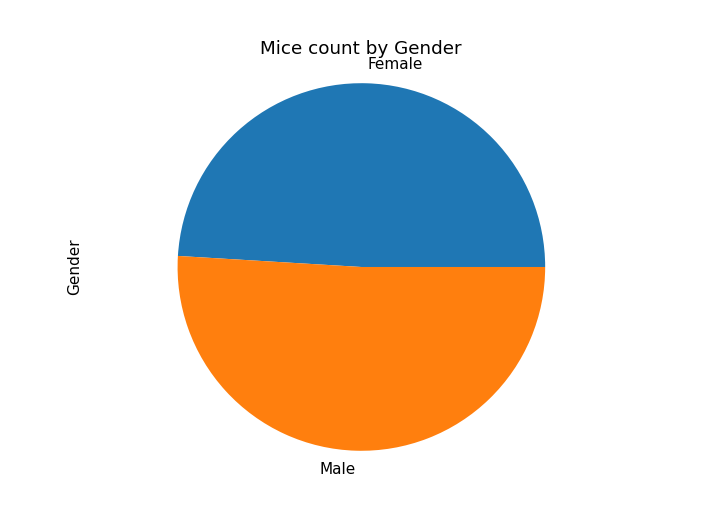

(-1.1065502689644005,
 1.1003119175697333,
 -1.1041200173094385,
 1.1079114197007642)

In [111]:
%matplotlib notebook
mouse_df1=mouse_df.groupby(['Sex'])
Sex = ["Female", "Male"]
count= mouse_df1.count()["Mouse ID"]
colors = ["blue", "orange"]

print(count)
gender_count = count.plot(kind="pie", y='Mice count', title=("Mice count by Gender"))
gender_count.set_ylabel("Gender")



# Create a pie chart based upon the trip duration of that single bike

plt.show()
plt.axis("equal")


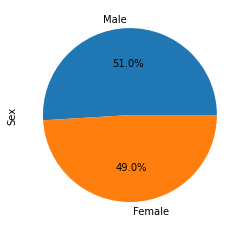

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64


<IPython.core.display.Javascript object>


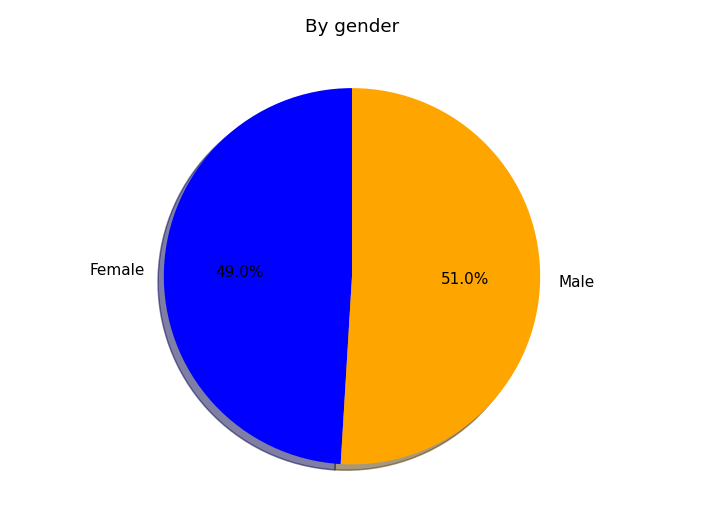

In [112]:
%matplotlib notebook
mouse_df1=mouse_df.groupby(['Sex'])
Sex = ["Female", "Male"]
count= mouse_df1.count()["Mouse ID"]
colors = ["blue", "orange"]

print(count)
plt.title("By gender")
plt.pie(count,  labels=Sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.show()
plt.tight_layout()

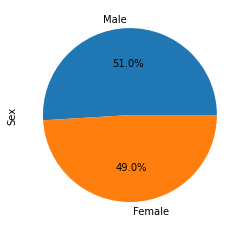

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


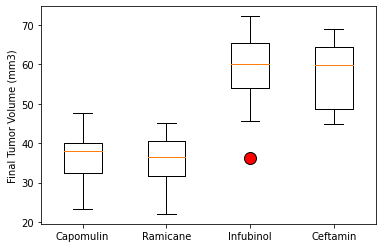

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

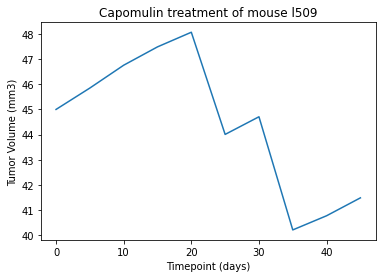

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


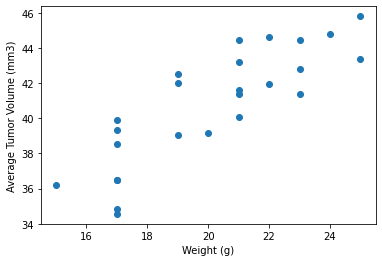

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


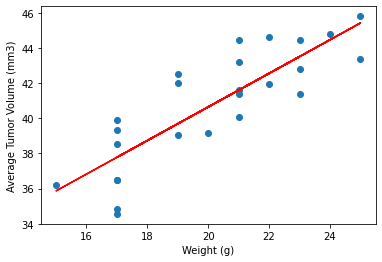

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
